In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')

In [3]:
X=dataset.iloc[:,[2,3]].values

In [4]:
y=dataset.iloc[:,4].values

In [5]:
from sklearn.cross_validation import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc_x=StandardScaler()

In [10]:
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [22]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [23]:
y_pred=classiifier.predict(X_test)

In [31]:
print('Accuracy is : ',classifier.score(X_test,y_test))

Accuracy is :  0.9


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm=confusion_matrix(y_test,y_pred)

In [27]:
cm

array([[61,  7],
       [ 3, 29]], dtype=int64)

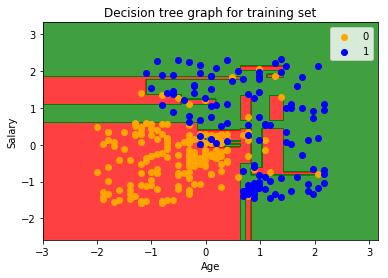

In [28]:
#visualization:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('Decision tree graph for training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

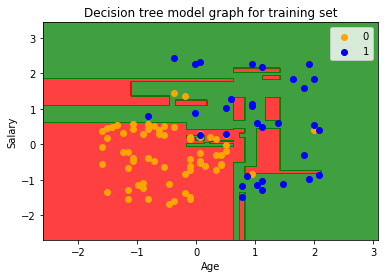

In [30]:
#for testing set
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('Decision tree model graph for training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
